<a href="https://colab.research.google.com/github/Josema9990/Modelos-de-clasificacion-/blob/main/CcsDatosEconm%C3%ADa_Examen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A continuación usaremos el set de dato Adult, con información que busca predecir si el ingreso anual de un individuo superan los US$50000 al año basándose en los datos del censo.

Los datos se encuentran disponible en el repositorio de [UC Irvine](https://archive.ics.uci.edu/dataset/2/adult),quienes disponen de una bilioteca para importar datos con Python.

A continuación procederemos a importar dichos datos.

```python
# Instalar biblioteca
%pip install ucimlrepo

# Importar biblioteca
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
adult = fetch_ucirepo(id=2)
  
# Guarda como dataframe
df = adult.data.original
```

## Parte 1: Análisis Exploratorio de los Datos

Para esta primera parte se pide realizar algunas tareas básicas:


- Importar y explorar el dataset
- Detección de valores faltante
- Limpieza de datos
- Análisis univariado: Puedes realizar gráficos como histogramas y gráficos de barras para visualizar la distribución de los datos.
- Análisis bivariado: Utiliza gráficos como boxplots para comparar la distribución de variables relevantes en relación a la variable target
- Correlaciones y visualización multivariada

Recuerda que cada etapa debe contar con una introducción a la tarea a realizar junto con una Síntesis de hallazgos

**Una vez finalizada esta parte debe generar un commit a la carpeta de GitHub que ha creado para esta evaluación**

## Parte 2: Modelo de Clasificación

Una vez que el conjunto de datos ha sido limpiado y preprocesado correctamente, el siguiente paso consiste en construir y evaluar modelos de clasificación binaria, cuyo objetivo es predecir si una persona gana más de US$50.000 anuales.

Para ello, utilice la biblioteca Lazypredict, la cual permite realizar una comparación exploratoria de múltiples modelos de clasificación estándar sin necesidad de definir previamente sus hiperparámetros. Esta herramienta resulta especialmente útil como punto de partida para identificar qué algoritmos presentan un mejor desempeño inicial sobre un conjunto de datos determinado.

Divida el dataset en un 80% para entrenamiento y un 20% para prueba, asegurándose de que todas las variables estén correctamente codificadas y preparadas para el análisis.

Además de ejecutar los modelos con Lazypredict, deberá:

- Comentar las ventajas y limitaciones de esta biblioteca en el contexto de una primera evaluación comparativa.

- Analizar los resultados obtenidos, identificando los modelos con mejor y peor desempeño.

**Una vez terminada esta parte debe actualizar su repositorio en GitHub**

In [1]:
# Instalar biblioteca
%pip install ucimlrepo

# Importar biblioteca
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
adult = fetch_ucirepo(id=2)

# Guarda como dataframe
df = adult.data.original

In [5]:
%pip install ucimlrepo
import pandas as pd
from ucimlrepo import fetch_ucirepo
adult = fetch_ucirepo(id=2)
df = adult.data.original
print("--- Información general del DataFrame ---")
df.info()
print("\n--- Primeras 5 filas del DataFrame ---")
print(df.head())
print("\n--- Estadísticas descriptivas de variables numéricas ---")
print(df.describe())
print("\n--- Valores únicos por columna ---")
for column in df.columns:
    print(f"\nColumna '{column}': {df[column].nunique()} valores únicos")
    if df[column].nunique() < 20:
        print(df[column].unique())

--- Información general del DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB

--- Primeras 5 filas del DataFrame ---
   age     

En el codigo de arriba lo que hice fue tener una visualizacion mas especifica de los datos para lograr identificarlos y saber que tipo son, y ademas saber si existen valores nulos.


--- Gráfico de barras para columnas categóricas (9 columnas) ---


/tmp/ipython-input-7-2718627023.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="viridis")
/tmp/ipython-input-7-2718627023.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="viridis")
/tmp/ipython-input-7-2718627023.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="viridis")
/tmp/ipython-input-7-2718627023.py:10: FutureWarning: 

Passing `palette`

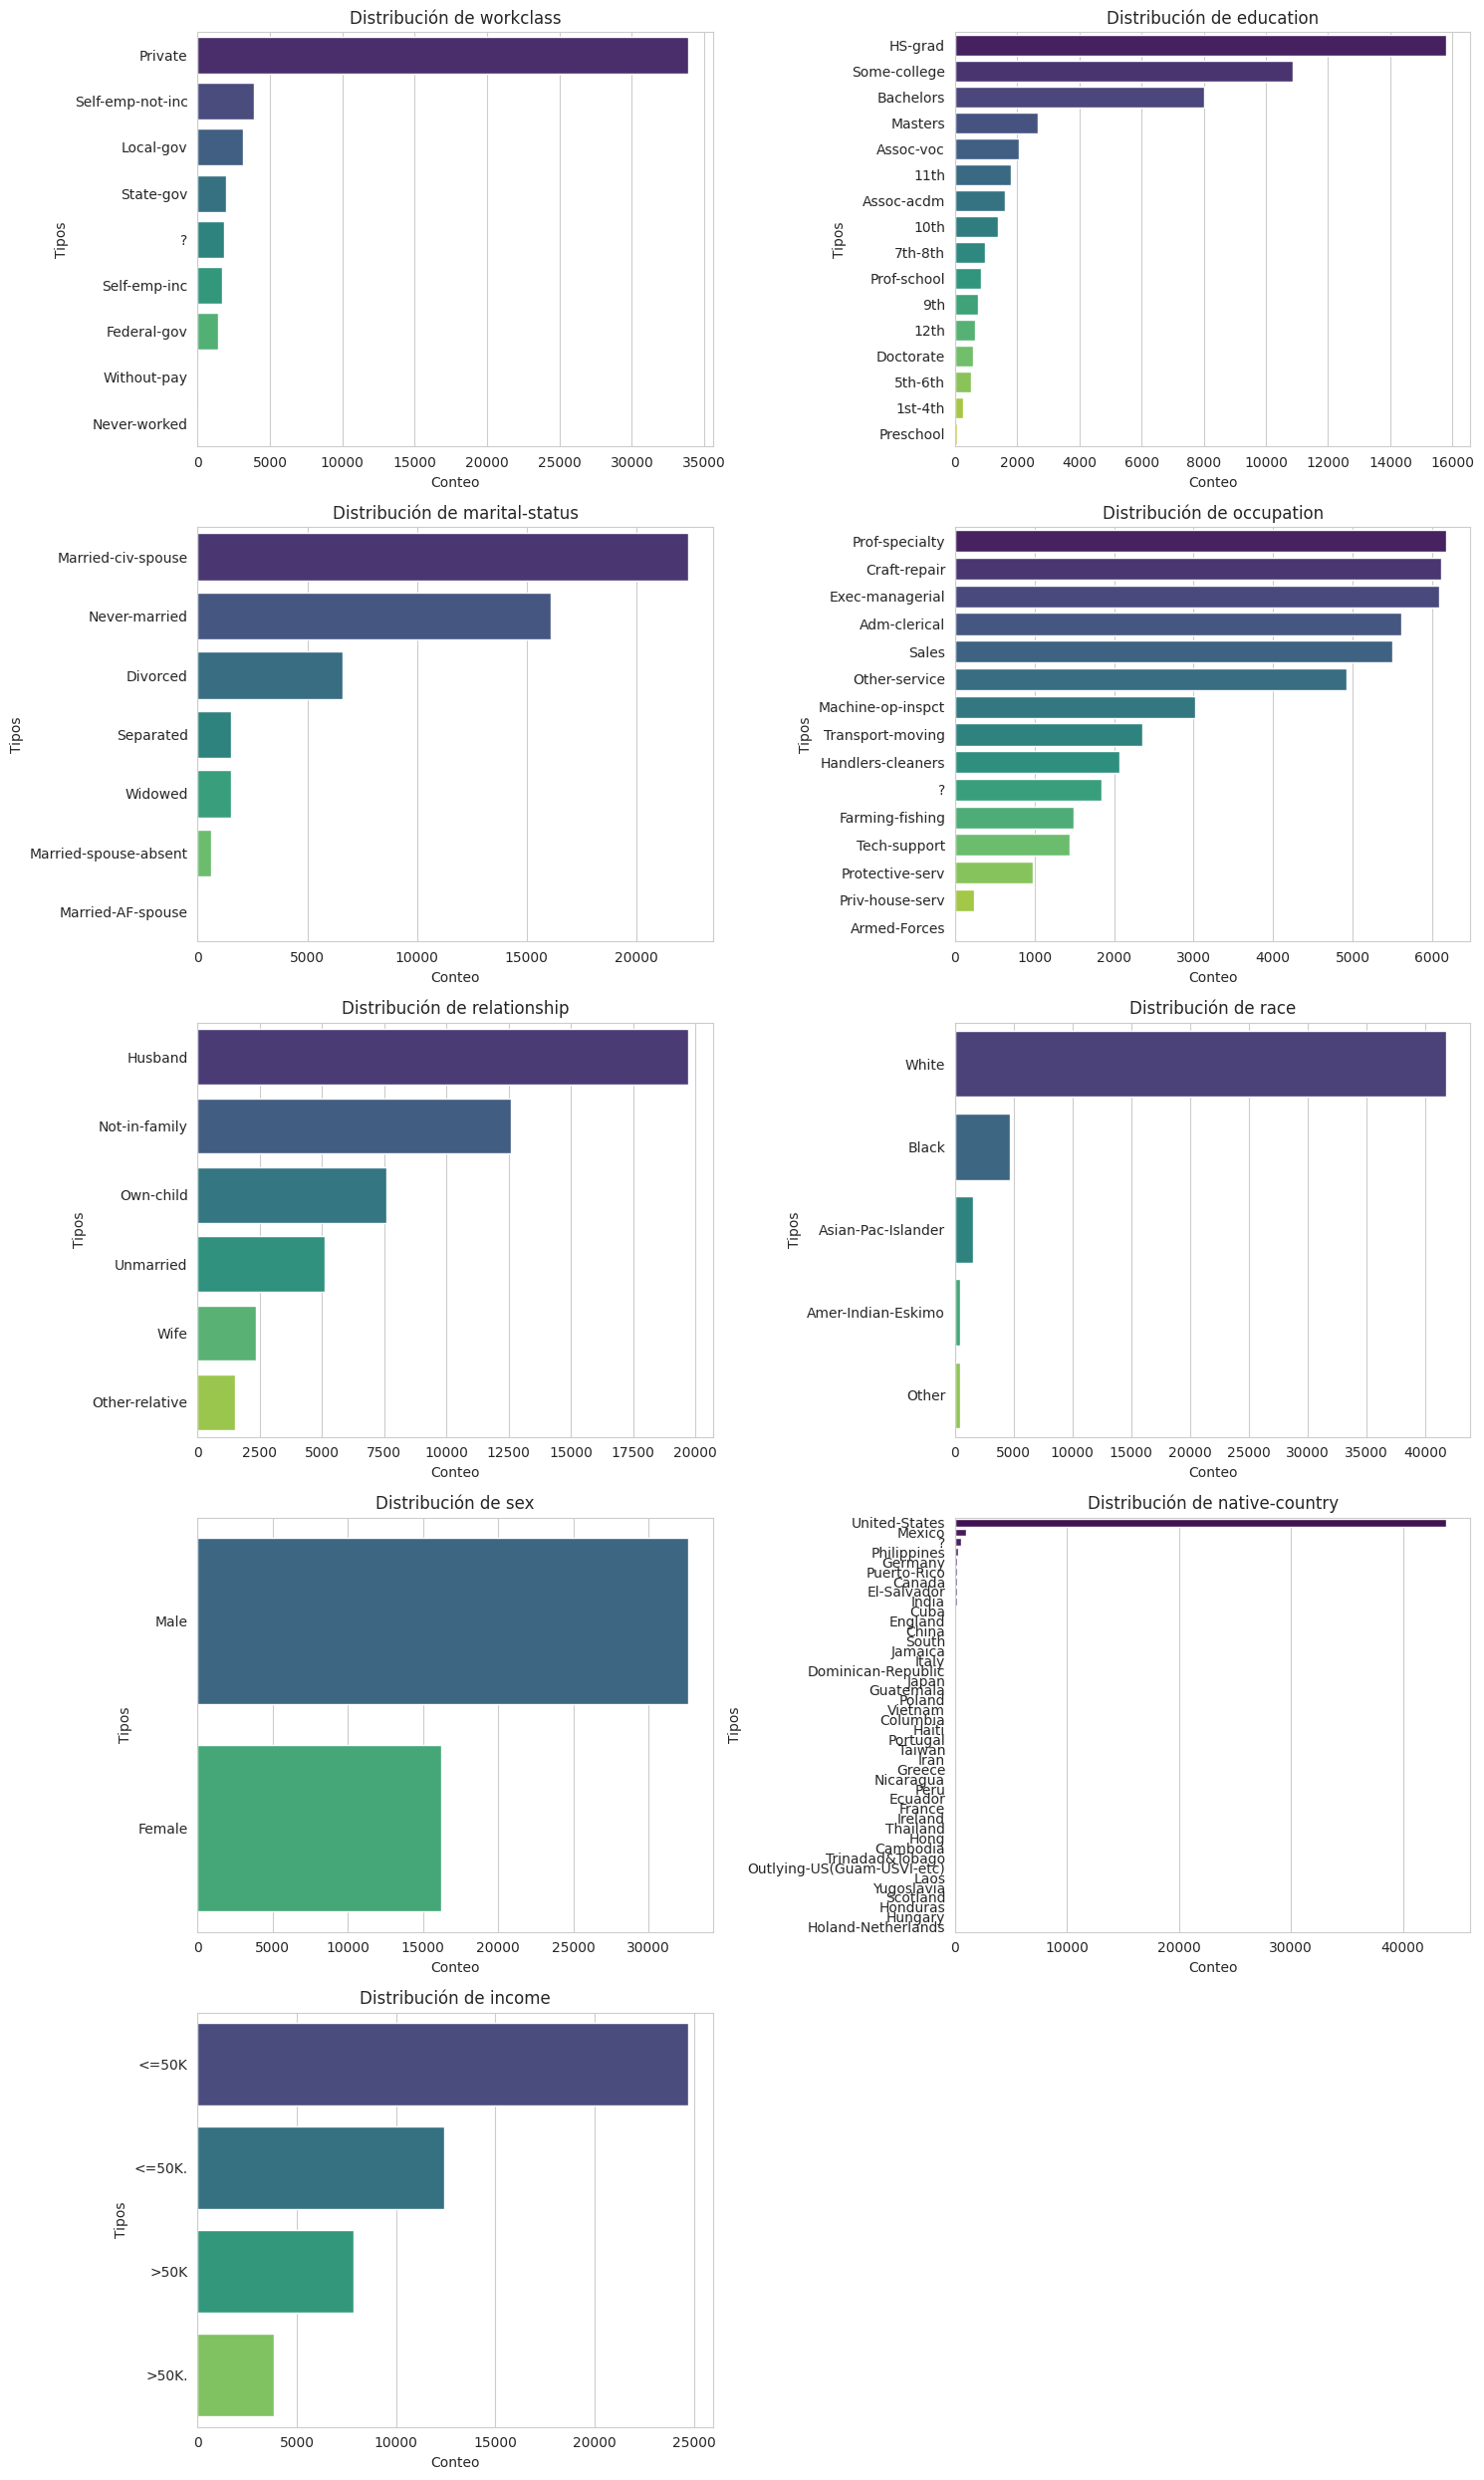

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
categorical_cols = df.select_dtypes(include='object').columns
print(f"\n--- Gráfico de barras para columnas categóricas ({len(categorical_cols)} columnas) ---")
sns.set_style("whitegrid")
plt.figure(figsize=(15, 25))

for i, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols) // 2 + 1, 2, i + 1) # Organiza los gráficos en subplots
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette="viridis")
    plt.title(f'Distribución de {col}', fontsize=12)
    plt.xlabel('Conteo', fontsize=10)
    plt.ylabel('Tipos')

plt.tight_layout()
plt.show()

Ahí hice multiples graficos de barra horizontales para saber la concentracion de los datos de todas las columnas.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


--- Generando Boxplots para variables numéricas vs. la variable objetivo 'income' ---


/tmp/ipython-input-9-169159754.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income', y=col, data=df, palette='pastel')
/tmp/ipython-input-9-169159754.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income', y=col, data=df, palette='pastel')
/tmp/ipython-input-9-169159754.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income', y=col, data=df, palette='pastel')
/tmp/ipython-input-9-169159754.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x`

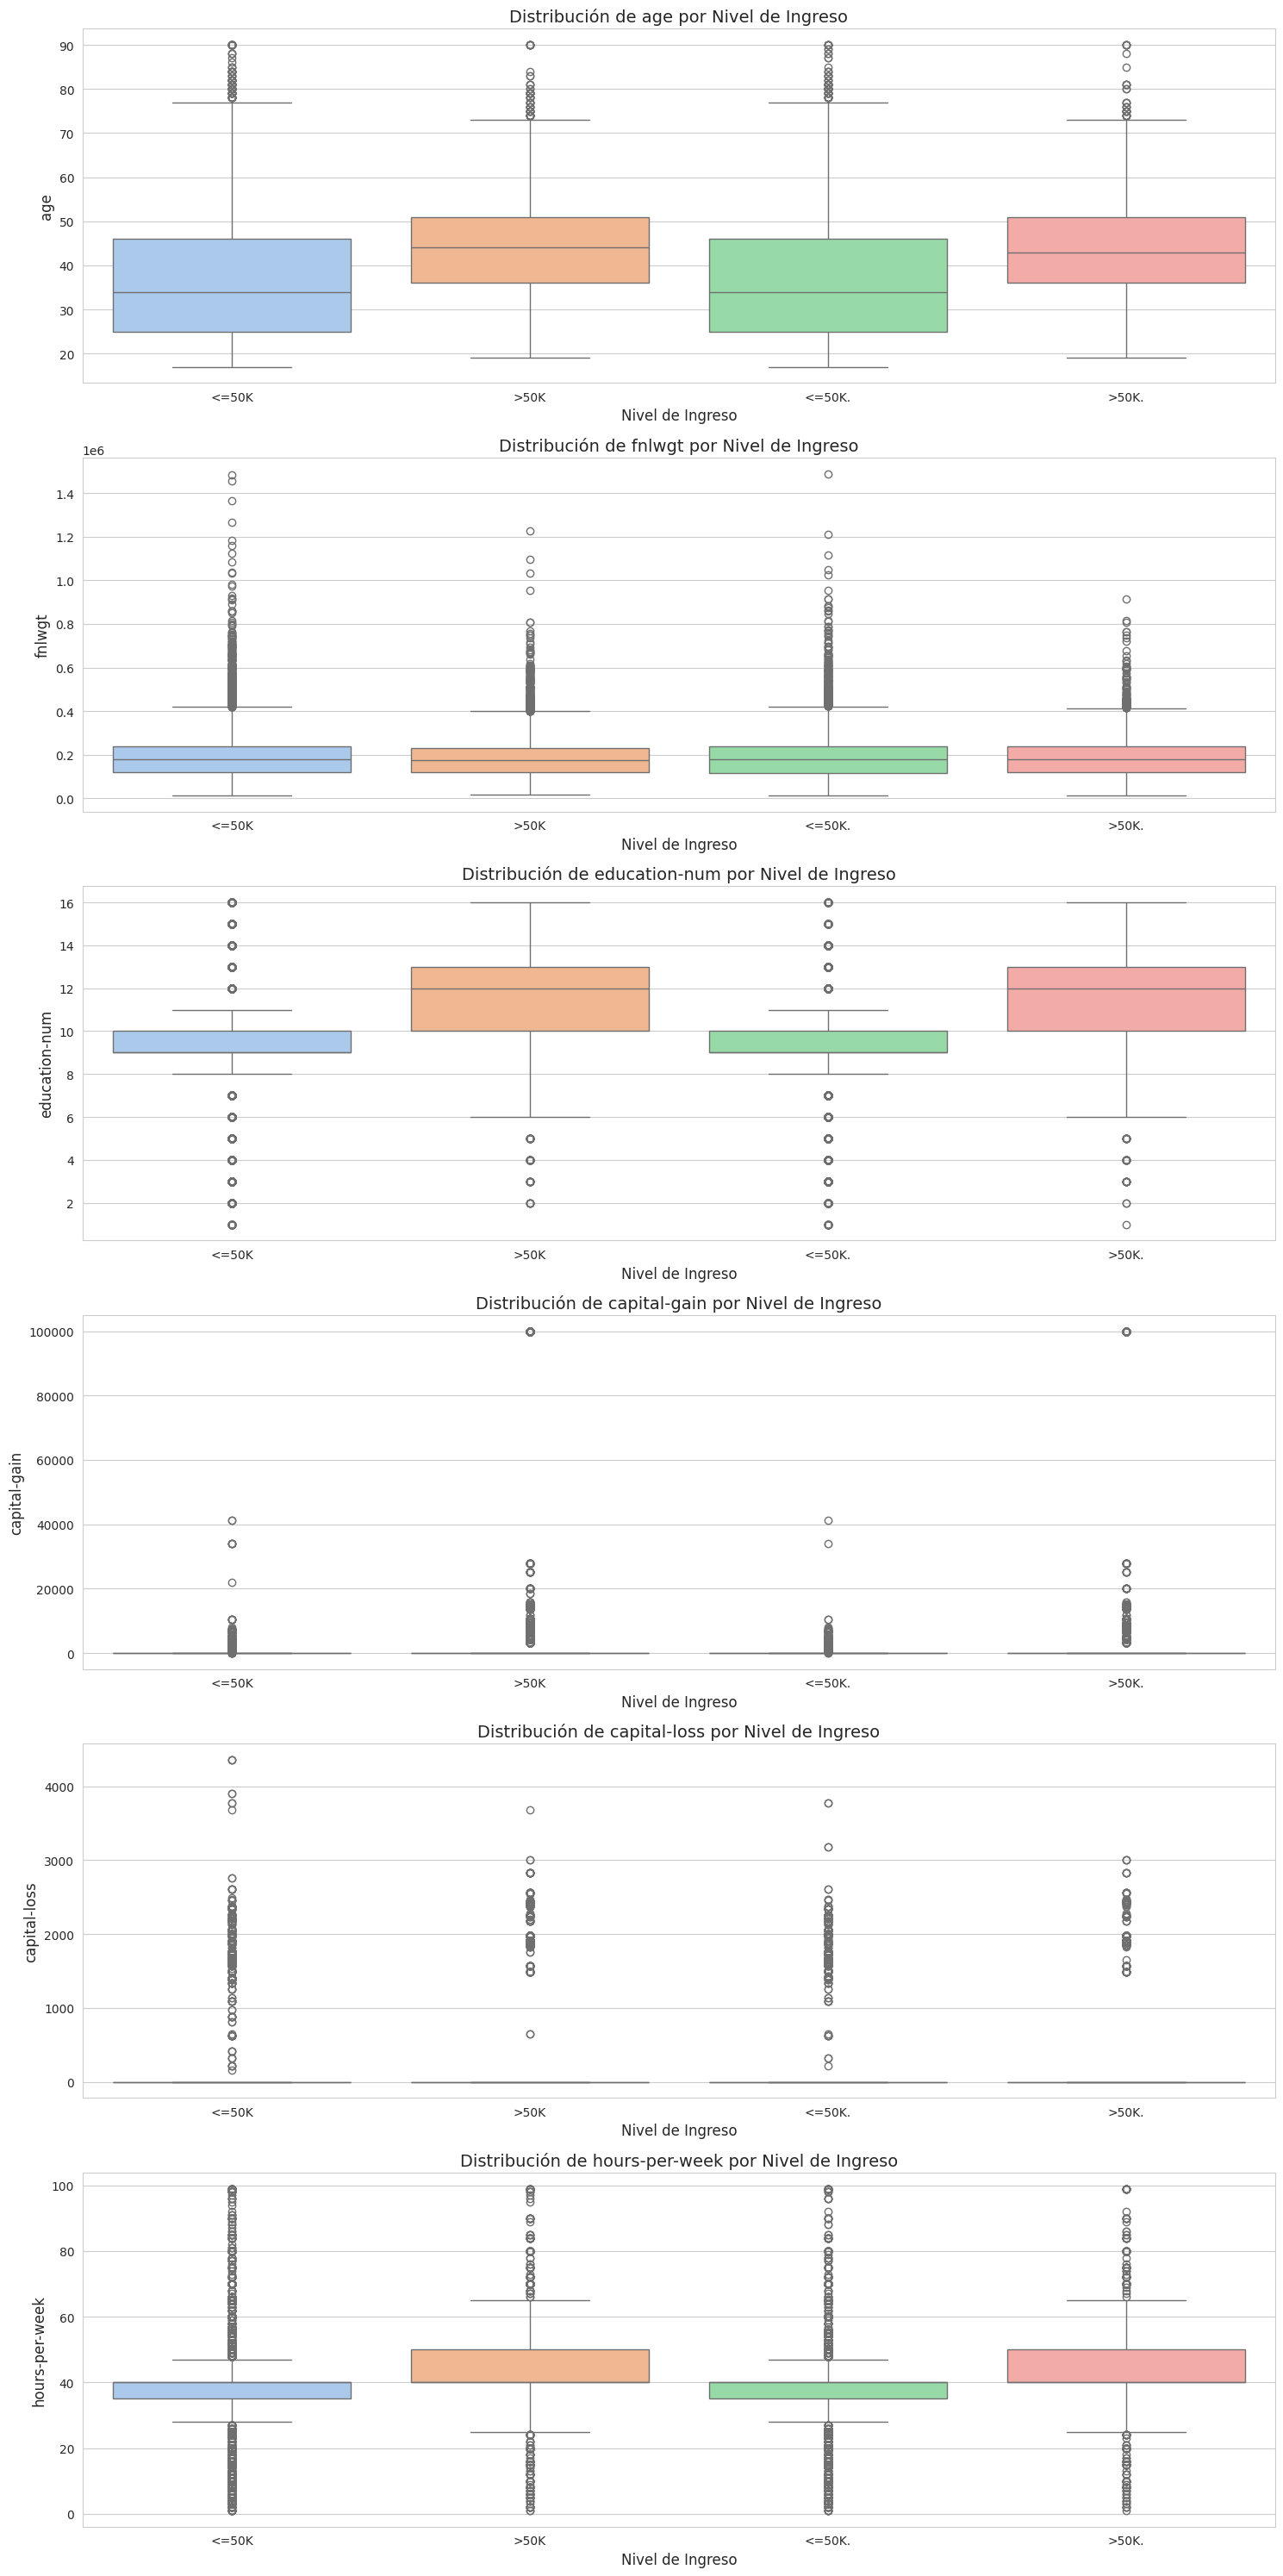

In [9]:

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("\n--- Generando Boxplots para variables numéricas vs. la variable objetivo 'income' ---")

if 'income' in df.columns:
    num_plots = len(numeric_cols)
    plt.figure(figsize=(15, 5 * num_plots))
    for i, col in enumerate(numeric_cols):

        if col == 'income':
            continue

        plt.subplot(num_plots, 1, i + 1) # Organiza los gráficos verticalmente
        sns.boxplot(x='income', y=col, data=df, palette='pastel')
        plt.title(f'Distribución de {col} por Nivel de Ingreso', fontsize=14)
        plt.xlabel('Nivel de Ingreso', fontsize=12)
        plt.ylabel(col, fontsize=12)

    plt.tight_layout()
    plt.show()
else:
    print("La columna 'income' no la encontre en el DataFrame asique falta poner el nombre de la variable objetivo.")

Ahí realice graficos boxplot para analizar la distribucion de las variables por nivel de ingreso, esto para tener un mayor conocimientyo sobre la relacion de estos, para asi comparar la distribución de variables relevantes en relación a la variable target.
EL resultado de esto fue que la variable edad es la que presenta una mayor distribucion dado el nivel de ingreso.


--- Cálculo y visualización de la matriz de correlación  ---


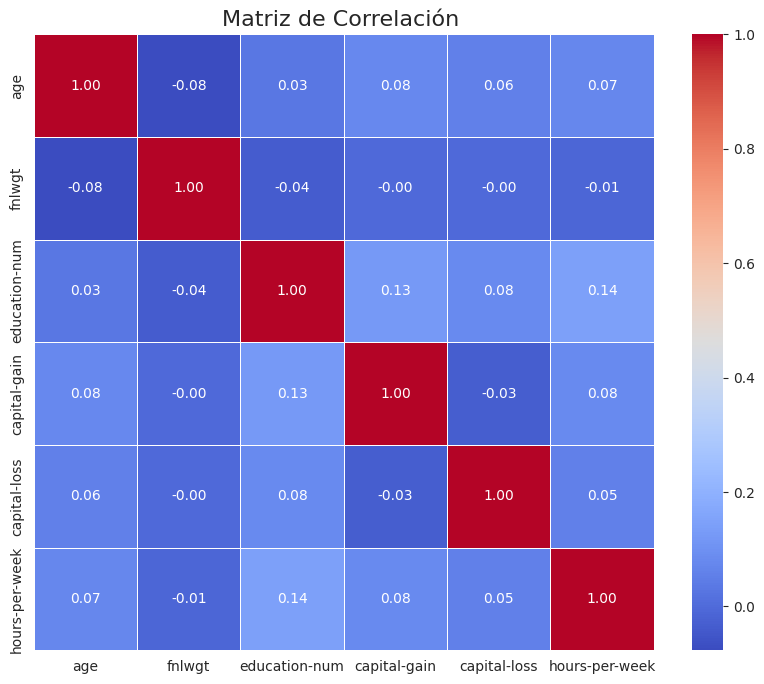

In [12]:

print("\n--- Cálculo y visualización de la matriz de correlación  ---")

numeric_df = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación ', fontsize=16)
plt.show()


Ahí realice una matriuz de correlacion para ver que tan correlacionadas estan las variuables entre si, para ademas saber si debo aplicar codigos y conocimientos del curso para limpiar nuevamente los datos para eliminar datos innesesarios que tienen una correlacion que no nos sirve. El resultado fue que dado todos los codigos aplicados anteriormente fueron utiles ya que como se muestra en los graficos, los datos estan muy correlacionados entre sí, es decir, todos tienen influenbcia en uno u otro.